# P2: Project proposal and initial analyses
When you are done with Homework H1, you will continue to work on the next project milestone. In Milestone P2, together with your team members, you will agree on and refine your project proposal. Your first task is to select a project. Even though we provide the datasets for you to use, at this juncture, it is your responsibility to perform initial analyses and verify that what you propose is feasible given the data (including any additional data you might bring in yourself), which is crucial for the success of the project.

The goal of this milestone is to intimately acquaint yourself with the data, preprocess it, and complete all the necessary descriptive statistics tasks. We expect you to have a pipeline in place, fully documented in a notebook, and show us that you have clear project goals.

When describing the relevant aspects of the data, and any other datasets you may intend to use, you should in particular show (non-exhaustive list):

- That you can handle the data in its size.
- That you understand what’s in the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have a reasonable plan and ideas for methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.

We will evaluate this milestone according to how well these steps have been done and documented, the quality of the code and its documentation, the feasibility and critical awareness of the project. We will also evaluate this milestone according to how clear, reasonable, and well thought-through the project idea is. Please use the second milestone to really check with us that everything is in order with your project (idea, feasibility, etc.) before you advance too much with the final Milestone P3! There will be project office hours dedicated to helping you.

You will work in a public GitHub repository dedicated to your project, which can be created by following this link. The repository will automatically be named ada-2023-project-<your_team_name>. By the Milestone P2 deadline, each team should have a single public GitHub repo under the epfl-ada GitHub organization, containing the project proposal and initial analysis code.

## P2 deliverable (done as a team): GitHub repository with the following:

- Readme.md file containing the detailed project proposal (up to 1000 words). Your README.md should contain:
  - Title
  - bstract: A 150 word description of the project idea and goals. What’s the motivation behind your project? What story would you like to tell, and why?
  - Research Questions: A list of research questions you would like to address during the project.
  - Proposed additional datasets (if any): List the additional dataset(s) you want to use (if any), and some ideas on how you expect to get, manage, process, and enrich it/them. Show us that you’ve read the docs and some examples, and that you have a clear idea on what to expect. Discuss data size and format if relevant. It is your responsibility to check that what you propose is feasible.
  - Methods
  - Proposed timeline
  - Organization within the team: A list of internal milestones up until project Milestone P3.
  - Questions for TAs (optional): Add here any questions you have for us related to the proposed project.
- Notebook containing initial analyses and data handling pipelines. We will grade the correctness, quality of code, and quality of textual descriptions.


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data with the correct format
data_folder = '../Data'
paths_folder = data_folder + '/wikispeedia_paths-and-graph'

# Define the columns of each dataframe
columns_f = ['hashedIpAddress','timestamp','durationInSec','path','rating']
columns_u = ['hashedIpAddress','timestamp','durationInSec','path','target', 'type']

# Define the path to each dataframe
finished_paths = paths_folder + '/paths_finished.tsv'
unfinished_paths = paths_folder + '/paths_unfinished.tsv'
distance_matrix_file = paths_folder + "/shortest-path-distance-matrix.txt"
articles_list_file = paths_folder + '/articles.tsv'

# Load the Data
df_success = pd.read_csv(finished_paths,comment='#',sep='\t',names=columns_f)
df_fail = pd.read_csv(unfinished_paths,comment='#',sep='\t',names=columns_u)

# Control
print('Finished Paths:')
display(df_success)

print('Unfinished Paths:')
display(df_fail)

Finished Paths:


,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0


Unfinished Paths:


,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


### Remarks
We notice the following:
- There are more finished paths than unfinished ones, this might imply players are unlikely to drop a game, or that players who give up are less likely to keep playing.
- There is an extra information with the unfinished paths, which is type. This value can be timeout or restart. The important thing to keep in mind here is, not all players give up, maybe their battery was drained or they lost their connection. Also the 2 data frames do not have the same dimensions, since the target of the search is encoded in the final article in the ```path``` column, whereas an unfinished game ended elsewhere entirely, and the search target therefore needs to be placed in the ```target``` column.

The failed paths dataset is parasited by games that were abandonned from the start. While one might consider that this might be the player giving up immediately and clicking off due to difficulty, we could also say it is because said player simply didn't *want* to play. It is simpler to just filter out all games that timed out within the first click.

As for those that ended in a restart, they're still valuable, as they might mean that the player is simply stuck, and we know the player *still wants to play.*

In [2]:
df_fail = df_fail[~((df_fail.type == 'timeout') &
                    (~df_fail['path'].str.contains(';')))].copy()   #find() returns -1 if not in str. Not finding a ; means player stayed at start
                                                                                                #Writing the inverse condition with a not is more clear
display(df_fail)

,hashedIpAddress,timestamp,durationInSec,path,target,type
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
5,131600803df4895e,1297100557,2009,Agriculture;History_of_the_world;China;Yangtze...,Grand_Canal_of_China,timeout
6,486bb79910fe9dd2,1297101660,1932,Mind;Christianity;Europe;Renaissance;Ancient_G...,Scouting,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


We also considered converting the ```timestamp``` data to a human readable form, but this makes processing that data more difficult overall. We keep this code here, if needed later.

In [3]:
# change unix timestamp code to human readable
#df_success['timestamp'] = df_success['timestamp'].apply(lambda x: pd.to_datetime(x, unit='s'))
#df_fail['timestamp']    = df_fail['timestamp'].apply(lambda x: pd.to_datetime(x, unit='s'))


#TODO do this cell once, and figure out how to write it to a tsv in a clean format

We create the ```paths``` variables to encode the different paths for different players

In [4]:
paths_success = df_success.path.apply(lambda x: x.split(';')).copy()
df_fail.path = df_fail.path.map(str) + ';' + df_fail.target
paths_failed  = df_fail.path.apply(lambda x: x.split(';'))
paths_filtered_success = paths_success.apply(lambda x: x[0] +' -> '+ x[len(x)-1]).copy()
paths_filtered_fail = paths_failed.apply(lambda x: x[0] +' -> '+ x[len(x)-1]).copy()
paths_filtered_total = pd.concat([paths_filtered_success, paths_filtered_fail])

game_reps_total=paths_filtered_total.value_counts()
display(game_reps_total)
game_reps_success=paths_filtered_success.value_counts()
game_reps_fail = paths_filtered_fail.value_counts().head()

path
Brain -> Telephone                         1946
Asteroid -> Viking                         1722
Theatre -> Zebra                           1710
Pyramid -> Bean                            1544
Batman -> Wood                              217
                                           ... 
Abhidhamma_Pitaka -> Denver%2C_Colorado       1
Abhidhamma_Pitaka -> French_Guiana            1
Abhidhamma_Pitaka -> Neil_Armstrong           1
Abhidhamma_Pitaka -> Mozambique               1
Jamaica -> Alan_Turing                        1
Name: count, Length: 41521, dtype: int64

### Intermediate summary
- **Start:** We started from a not very clean dataset and we cleaned it
- **Current:** We then filtered the data and were able to extract some information such as the most and least played games
- **Goal:** We can now study these games and analyses the players this may (or may not) help us answer the following question: **Does playing wikispeedia teach players anything?**
- **Next:** To do so we will now analyse the players of the following games:
    - Asteroid -> Viking (AV)
    - Brain -> Telephone (BT)
    - Theatre -> Zebra (TZ)
    - Pyramid -> Bean (PB)
    
    These games were played over a thousand times, they allow us to compare player skill in a more or less objective fashion, as the same game would have the same "difficulty" score, regardless of how that is defined. A player who's learned much, would have an easier time navigating Wikispeedia, and would thus be faster.

In [5]:
# Extract the DataFrames reflecting those specific games

AV = df_success[paths_filtered_success=='Asteroid -> Viking'].copy()
BT = df_success[paths_filtered_success=='Brain -> Telephone'].copy()
TZ = df_success[paths_filtered_success=='Theatre -> Zebra'].copy()
PB = df_success[paths_filtered_success=='Pyramid -> Bean'].copy()

max_game_duration = 600

# trim out games longer than 10 minutes, this may reflect a player walking away from the screen halfway, or getting distacted in real life
AV_trimmed=AV[AV.durationInSec<=max_game_duration].copy()
BT_trimmed=BT[BT.durationInSec<=max_game_duration].copy()
TZ_trimmed=TZ[TZ.durationInSec<=max_game_duration].copy()
PB_trimmed=PB[PB.durationInSec<=max_game_duration].copy()


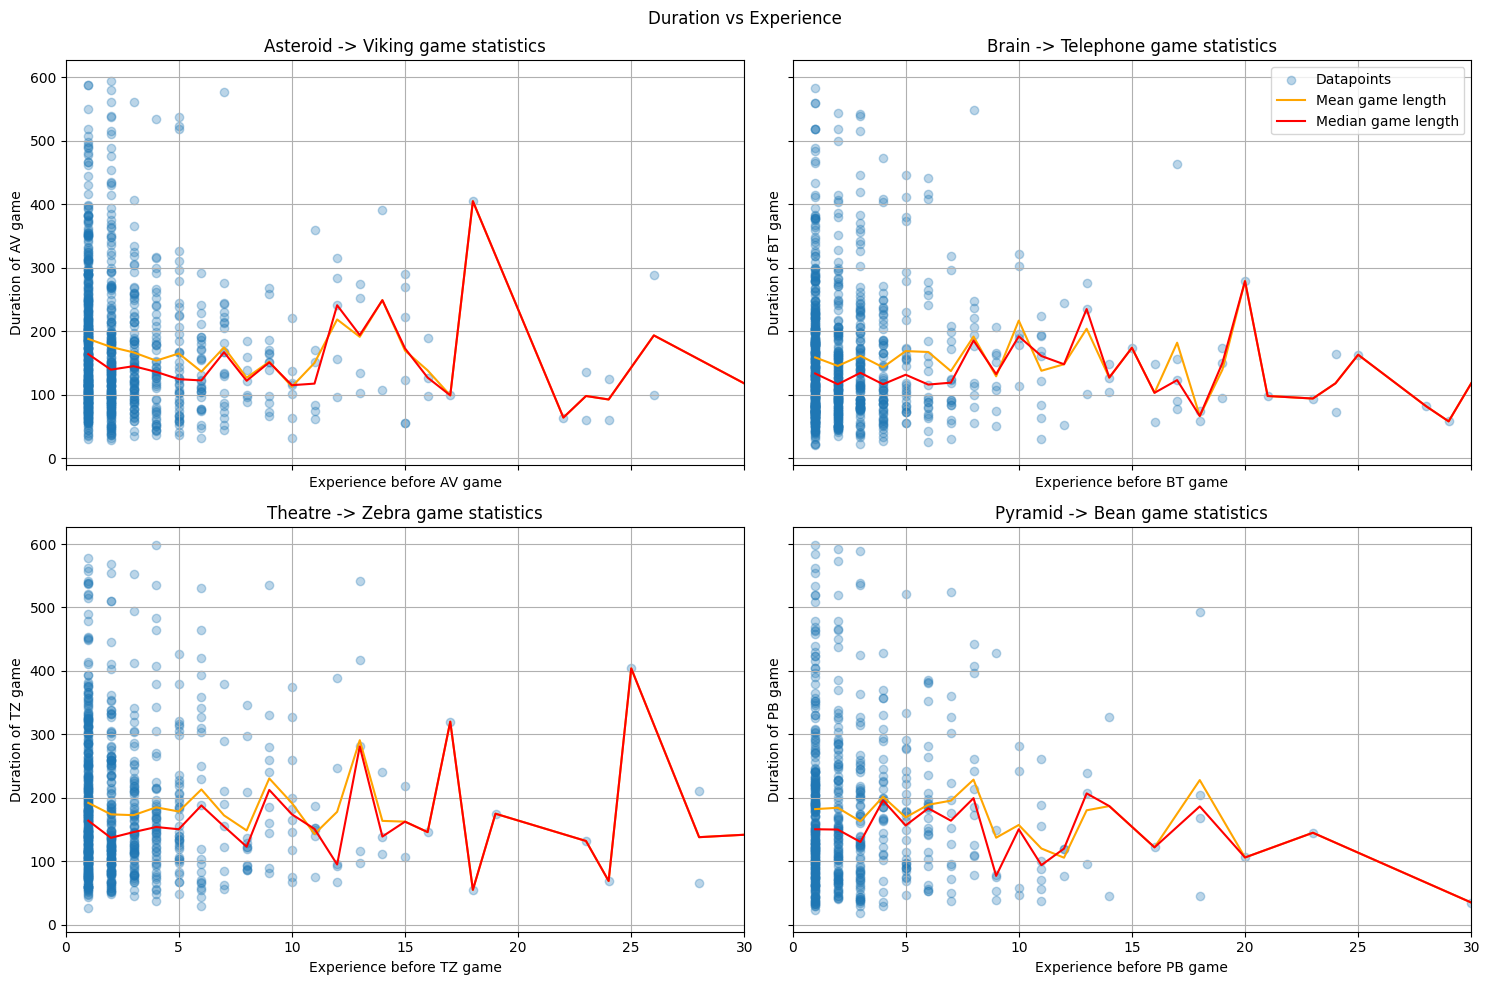

In [9]:
df_success_filtered_AV = df_success[df_success.hashedIpAddress.isin(AV_trimmed.hashedIpAddress)].groupby('hashedIpAddress')
df_success_filtered_BT = df_success[df_success.hashedIpAddress.isin(BT_trimmed.hashedIpAddress)].groupby('hashedIpAddress')
df_success_filtered_TZ = df_success[df_success.hashedIpAddress.isin(TZ_trimmed.hashedIpAddress)].groupby('hashedIpAddress')
df_success_filtered_PB = df_success[df_success.hashedIpAddress.isin(PB_trimmed.hashedIpAddress)].groupby('hashedIpAddress')

experience_AV = pd.DataFrame(columns=('hashedIpAddress', 'Experience before AV game', 'Duration of AV game'))
experience_BT = pd.DataFrame(columns=('hashedIpAddress', 'Experience before BT game', 'Duration of BT game'))
experience_TZ = pd.DataFrame(columns=('hashedIpAddress', 'Experience before TZ game', 'Duration of TZ game'))
experience_PB = pd.DataFrame(columns=('hashedIpAddress', 'Experience before PB game', 'Duration of PB game'))

for user,data in df_success_filtered_AV:
    time_of_playing_AV = AV_trimmed[AV_trimmed.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_AV])
    user_game_duration = AV_trimmed[AV_trimmed.hashedIpAddress==user].durationInSec.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before AV game': [number_of_games_before], 'Duration of AV game': [user_game_duration]})
    experience_AV=pd.concat([experience_AV,new_row],ignore_index=True)

for user,data in df_success_filtered_BT:
    time_of_playing_BT = BT_trimmed[BT_trimmed.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_BT])
    user_game_duration = BT_trimmed[BT_trimmed.hashedIpAddress==user].durationInSec.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before BT game': [number_of_games_before], 'Duration of BT game': [user_game_duration]})
    experience_BT=pd.concat([experience_BT,new_row],ignore_index=True)

for user,data in df_success_filtered_TZ:
    time_of_playing_TZ = TZ_trimmed[TZ_trimmed.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_TZ])
    user_game_duration = TZ_trimmed[TZ_trimmed.hashedIpAddress==user].durationInSec.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before TZ game': [number_of_games_before], 'Duration of TZ game': [user_game_duration]})
    experience_TZ=pd.concat([experience_TZ,new_row],ignore_index=True)

for user,data in df_success_filtered_PB:
    time_of_playing_PB = PB_trimmed[PB_trimmed.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_PB])
    user_game_duration = PB_trimmed[PB_trimmed.hashedIpAddress==user].durationInSec.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before PB game': [number_of_games_before], 'Duration of PB game': [user_game_duration]})
    experience_PB=pd.concat([experience_PB,new_row],ignore_index=True)


# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Duration vs Experience')

# Scatter plot for AV
axes[0, 0].scatter(experience_AV['Experience before AV game'], experience_AV['Duration of AV game'], alpha=0.3)
axes[0, 0].plot(experience_AV.groupby('Experience before AV game')['Duration of AV game'].mean(), 'orange')
axes[0, 0].plot(experience_AV.groupby('Experience before AV game')['Duration of AV game'].median(), 'red')
axes[0, 0].set_title('Asteroid -> Viking game statistics')
axes[0, 0].set_xlabel('Experience before AV game')
axes[0, 0].set_ylabel('Duration of AV game')
axes[0, 0].set_xlim(0, 30)
axes[0, 0].grid(True)

# Scatter plot for BT
axes[0, 1].scatter(experience_BT['Experience before BT game'], experience_BT['Duration of BT game'], alpha=0.3, label = "Datapoints")
axes[0, 1].plot(experience_BT.groupby('Experience before BT game')['Duration of BT game'].mean(), 'orange', label = "Mean game length")
axes[0, 1].plot(experience_BT.groupby('Experience before BT game')['Duration of BT game'].median(), 'red', label = "Median game length")
axes[0, 1].set_title('Brain -> Telephone game statistics')
axes[0, 1].set_xlabel('Experience before BT game')
axes[0, 1].set_ylabel('Duration of BT game')
axes[0, 1].grid(True)
axes[0, 1].set_xlim(0, 30)
axes[0, 1].legend()

# Scatter plot for TZ
axes[1, 0].scatter(experience_TZ['Experience before TZ game'], experience_TZ['Duration of TZ game'], alpha=0.3)
axes[1, 0].plot(experience_TZ.groupby('Experience before TZ game')['Duration of TZ game'].mean(), 'orange')
axes[1, 0].plot(experience_TZ.groupby('Experience before TZ game')['Duration of TZ game'].median(), 'red')
axes[1, 0].set_title('Theatre -> Zebra game statistics')
axes[1, 0].set_xlabel('Experience before TZ game')
axes[1, 0].set_ylabel('Duration of TZ game')
axes[1, 0].grid(True)
axes[1, 0].set_xlim(0, 30)

# Scatter plot for PB
axes[1, 1].scatter(experience_PB['Experience before PB game'], experience_PB['Duration of PB game'], alpha=0.3)
axes[1, 1].plot(experience_PB.groupby('Experience before PB game')['Duration of PB game'].mean(), 'orange')
axes[1, 1].plot(experience_PB.groupby('Experience before PB game')['Duration of PB game'].median(), 'red')
axes[1, 1].set_title('Pyramid -> Bean game statistics')
axes[1, 1].set_xlabel('Experience before PB game')
axes[1, 1].set_ylabel('Duration of PB game')
axes[1, 1].grid(True)
axes[1, 1].set_xlim(0, 30)

plt.tight_layout()
plt.show()

From these graphs we learn that there are very few datapoints for players having played more than 10 games beforehand, and the data is overall **skewed** by the sample size disparity (so much fewer datapoints for less experienced players). We can tell from inspecting the graphs, that players do not necessarily get faster just by playing more games, for games of the same difficulty.

But how about path lengths? The data we've created and studied up to now does not account for path length, and a better measure of performance, it could be argued, would be how many articles it took a player to go from point A to point B.


Let's first extract the optimal path lengths, and upgrade our DataFrame with information about the game's length (in number of articles), as compared to optimal game length.

In [10]:
with open(distance_matrix_file, 'r') as file:
    content = file.read()

# Convert to a 2D list representing the distance matrix
rows = content.strip().split('\n')[17:]
distance_matrix = [[int(dist) if dist != '_' else -1 for dist in row] for row in rows]

# We need to get the list of articles as presented in the data, in order to know their index in the dataset, and hence interpret our distance matrix
articles = pd.read_csv("../data/wikispeedia_paths-and-graph/articles.tsv", sep='\t', skiprows= 11, skip_blank_lines=True)
articles_arr = articles.values
article_list = (item[0] for item in articles_arr)

article_index_map = {article: index for index, article in enumerate(article_list)}

In [11]:
def get_distance(row):
    start_index = row.start
    end_index = row.end
    if start_index is None or end_index is None:
        return -1
    return distance_matrix[start_index][end_index]

#Let's augment our success Dataframe, with the start and end id, as well as a game_len and optimal_len column
df_success['start'] = df_success.path.apply(lambda x: article_index_map.get(x.split(';')[0])) 
df_success['end']   = df_success.path.apply(lambda x: article_index_map.get(x.split(';')[-1]))
df_success['game_len'] = df_success.path.apply(lambda x: len(x.split(';')) - 1) 
df_success['optimal_len'] = df_success.apply(get_distance, axis = 1)

In [12]:
df_success.head()

,hashedIpAddress,timestamp,durationInSec,path,rating,start,end,game_len,optimal_len
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN,10,143,8,3
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,10,143,4,3
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,10,143,7,3
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,10,1793,3,2
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,10,2266,6,3


Now that we succesfully applied this to our DataFrame, let's apply this to our 4 focus games, and see what we get!

In [13]:
AV_trimmed['start'] = AV_trimmed.path.apply(lambda x: article_index_map.get(x.split(';')[0]))
AV_trimmed['end']   = AV_trimmed.path.apply(lambda x: article_index_map.get(x.split(';')[-1]))
AV_trimmed['game_len'] = AV_trimmed.path.apply(lambda x: len(x.split(';')) - 1) 
AV_trimmed['optimal_len'] = AV_trimmed.apply(get_distance, axis = 1)

BT_trimmed['start'] = BT_trimmed.path.apply(lambda x: article_index_map.get(x.split(';')[0])) 
BT_trimmed['end']   = BT_trimmed.path.apply(lambda x: article_index_map.get(x.split(';')[-1]))
BT_trimmed['game_len'] = BT_trimmed.path.apply(lambda x: len(x.split(';')) - 1) 
BT_trimmed['optimal_len'] = BT_trimmed.apply(get_distance, axis = 1)

TZ_trimmed['start'] = TZ_trimmed.path.apply(lambda x: article_index_map.get(x.split(';')[0])) 
TZ_trimmed['end']   = TZ_trimmed.path.apply(lambda x: article_index_map.get(x.split(';')[-1]))
TZ_trimmed['game_len'] = TZ_trimmed.path.apply(lambda x: len(x.split(';')) - 1) 
TZ_trimmed['optimal_len'] = TZ_trimmed.apply(get_distance, axis = 1)

PB_trimmed['start'] = PB_trimmed.path.apply(lambda x: article_index_map.get(x.split(';')[0])) 
PB_trimmed['end']   = PB_trimmed.path.apply(lambda x: article_index_map.get(x.split(';')[-1]))
PB_trimmed['game_len'] = PB_trimmed.path.apply(lambda x: len(x.split(';')) - 1) 
PB_trimmed['optimal_len'] = PB_trimmed.apply(get_distance, axis = 1)


print(f"The optimal path lengths are: \n AV : {AV_trimmed['optimal_len'].iloc[0]}\n BT : {BT_trimmed['optimal_len'].iloc[0]}\n TZ : {TZ_trimmed['optimal_len'].iloc[0]}\n PB : {PB_trimmed['optimal_len'].iloc[0]}")


The optimal path lengths are: 
 AV : 3
 BT : 3
 TZ : 3
 PB : 3


All 4 games have the same optimal path length!

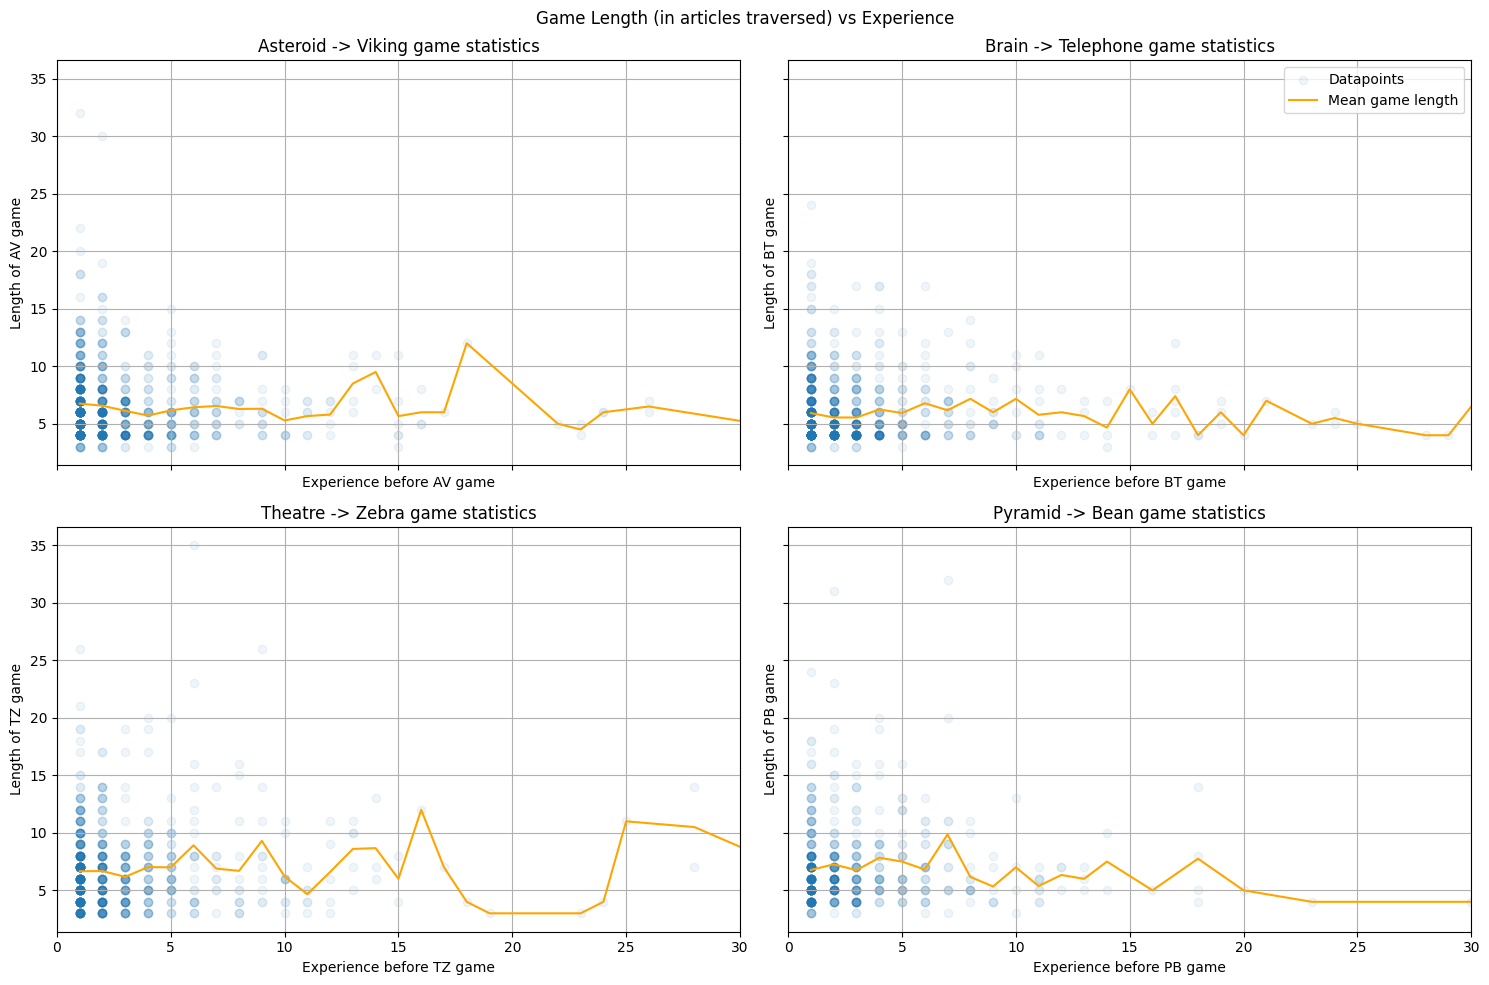

In [14]:
df_success_filtered_AV = df_success[df_success.hashedIpAddress.isin(AV_trimmed.hashedIpAddress)].groupby('hashedIpAddress')
df_success_filtered_BT = df_success[df_success.hashedIpAddress.isin(BT_trimmed.hashedIpAddress)].groupby('hashedIpAddress')
df_success_filtered_TZ = df_success[df_success.hashedIpAddress.isin(TZ_trimmed.hashedIpAddress)].groupby('hashedIpAddress')
df_success_filtered_PB = df_success[df_success.hashedIpAddress.isin(PB_trimmed.hashedIpAddress)].groupby('hashedIpAddress')

experience_AV = pd.DataFrame(columns=('hashedIpAddress', 'Experience before AV game', 'Length of AV game'))
experience_BT = pd.DataFrame(columns=('hashedIpAddress', 'Experience before BT game', 'Length of BT game'))
experience_TZ = pd.DataFrame(columns=('hashedIpAddress', 'Experience before TZ game', 'Length of TZ game'))
experience_PB = pd.DataFrame(columns=('hashedIpAddress', 'Experience before PB game', 'Length of PB game'))

for user,data in df_success_filtered_AV:
    time_of_playing_AV = AV_trimmed[AV_trimmed.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_AV])
    user_game_duration = AV_trimmed[AV_trimmed.hashedIpAddress==user].game_len.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before AV game': [number_of_games_before], 'Length of AV game': [user_game_duration]})
    experience_AV=pd.concat([experience_AV,new_row],ignore_index=True)

for user,data in df_success_filtered_BT:
    time_of_playing_BT = BT_trimmed[BT_trimmed.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_BT])
    user_game_duration = BT_trimmed[BT_trimmed.hashedIpAddress==user].game_len.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before BT game': [number_of_games_before], 'Length of BT game': [user_game_duration]})
    experience_BT=pd.concat([experience_BT,new_row],ignore_index=True)

for user,data in df_success_filtered_TZ:
    time_of_playing_TZ = TZ_trimmed[TZ_trimmed.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_TZ])
    user_game_duration = TZ_trimmed[TZ_trimmed.hashedIpAddress==user].game_len.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before TZ game': [number_of_games_before], 'Length of TZ game': [user_game_duration]})
    experience_TZ=pd.concat([experience_TZ,new_row],ignore_index=True)

for user,data in df_success_filtered_PB:
    time_of_playing_PB = PB_trimmed[PB_trimmed.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_PB])
    user_game_duration = PB_trimmed[PB_trimmed.hashedIpAddress==user].game_len.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before PB game': [number_of_games_before], 'Length of PB game': [user_game_duration]})
    experience_PB=pd.concat([experience_PB,new_row],ignore_index=True)


# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Game Length (in articles traversed) vs Experience')

# Scatter plot for AV
axes[0, 0].scatter(experience_AV['Experience before AV game'], experience_AV['Length of AV game'], alpha=0.07)
axes[0, 0].plot(experience_AV.groupby('Experience before AV game')['Length of AV game'].mean(), 'orange')
axes[0, 0].set_title('Asteroid -> Viking game statistics')
axes[0, 0].set_xlabel('Experience before AV game')
axes[0, 0].set_ylabel('Length of AV game')
axes[0, 0].set_xlim(0, 30)
axes[0, 0].grid(True)

# Scatter plot for BT
axes[0, 1].scatter(experience_BT['Experience before BT game'], experience_BT['Length of BT game'], alpha=0.07, label = "Datapoints")
axes[0, 1].plot(experience_BT.groupby('Experience before BT game')['Length of BT game'].mean(), 'orange', label = "Mean game length")
axes[0, 1].set_title('Brain -> Telephone game statistics')
axes[0, 1].set_xlabel('Experience before BT game')
axes[0, 1].set_ylabel('Length of BT game')
axes[0, 1].grid(True)
axes[0, 1].set_xlim(0, 30)
axes[0, 1].legend()

# Scatter plot for TZ
axes[1, 0].scatter(experience_TZ['Experience before TZ game'], experience_TZ['Length of TZ game'], alpha=0.07)
axes[1, 0].plot(experience_TZ.groupby('Experience before TZ game')['Length of TZ game'].mean(), 'orange')
axes[1, 0].set_title('Theatre -> Zebra game statistics')
axes[1, 0].set_xlabel('Experience before TZ game')
axes[1, 0].set_ylabel('Length of TZ game')
axes[1, 0].grid(True)
axes[1, 0].set_xlim(0, 30)

# Scatter plot for PB
axes[1, 1].scatter(experience_PB['Experience before PB game'], experience_PB['Length of PB game'], alpha=0.07)
axes[1, 1].plot(experience_PB.groupby('Experience before PB game')['Length of PB game'].mean(), 'orange')
axes[1, 1].set_title('Pyramid -> Bean game statistics')
axes[1, 1].set_xlabel('Experience before PB game')
axes[1, 1].set_ylabel('Length of PB game')
axes[1, 1].grid(True)
axes[1, 1].set_xlim(0, 30)

plt.tight_layout()
plt.show()

This dataset has the exact same issues as the previous one, and this is shown by these graphs similarly.

In [15]:
def compute_MTPP(row):
    return row.durationInSec/row.game_len

AV_trimmed['MTPP'] = AV_trimmed.apply(compute_MTPP, axis = 1)
BT_trimmed['MTPP'] = BT_trimmed.apply(compute_MTPP, axis = 1)
TZ_trimmed['MTPP'] = TZ_trimmed.apply(compute_MTPP, axis = 1)
PB_trimmed['MTPP'] = PB_trimmed.apply(compute_MTPP, axis = 1)


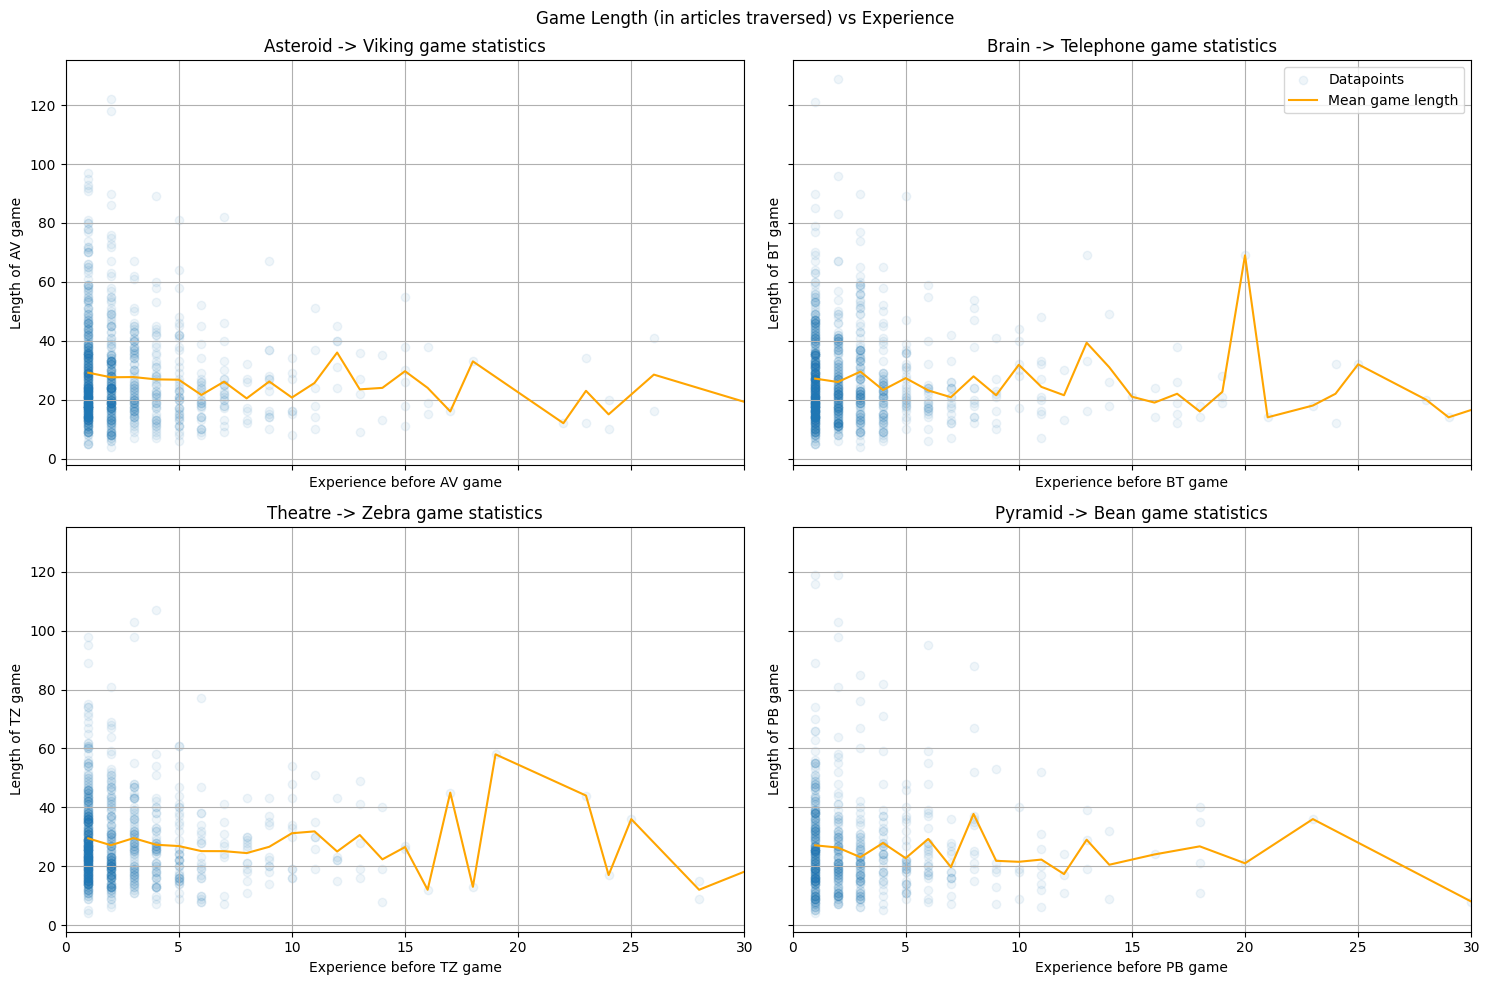

In [17]:
experience_AV = pd.DataFrame(columns=('hashedIpAddress', 'Experience before AV game', 'MTPP'))
experience_BT = pd.DataFrame(columns=('hashedIpAddress', 'Experience before BT game', 'MTPP'))
experience_TZ = pd.DataFrame(columns=('hashedIpAddress', 'Experience before TZ game', 'MTPP'))
experience_PB = pd.DataFrame(columns=('hashedIpAddress', 'Experience before PB game', 'MTPP'))

for user,data in df_success_filtered_AV:
    time_of_playing_AV = AV_trimmed[AV_trimmed.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_AV])
    MTPP = AV_trimmed[AV_trimmed.hashedIpAddress==user].MTPP.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before AV game': [number_of_games_before], 'MTPP': [MTPP]})
    experience_AV=pd.concat([experience_AV,new_row],ignore_index=True)

for user,data in df_success_filtered_BT:
    time_of_playing_BT = BT_trimmed[BT_trimmed.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_BT])
    MTPP = BT_trimmed[BT_trimmed.hashedIpAddress==user].MTPP.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before BT game': [number_of_games_before], 'MTPP': [MTPP]})
    experience_BT=pd.concat([experience_BT,new_row],ignore_index=True)

for user,data in df_success_filtered_TZ:
    time_of_playing_TZ = TZ_trimmed[TZ_trimmed.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_TZ])
    MTPP = TZ_trimmed[TZ_trimmed.hashedIpAddress==user].MTPP.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before TZ game': [number_of_games_before], 'MTPP': [MTPP]})
    experience_TZ=pd.concat([experience_TZ,new_row],ignore_index=True)

for user,data in df_success_filtered_PB:
    time_of_playing_PB = PB_trimmed[PB_trimmed.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_PB])
    MTPP = PB_trimmed[PB_trimmed.hashedIpAddress==user].MTPP.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before PB game': [number_of_games_before], 'MTPP': [MTPP]})
    experience_PB=pd.concat([experience_PB,new_row],ignore_index=True)


# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Game Length (in articles traversed) vs Experience')

# Scatter plot for AV
axes[0, 0].scatter(experience_AV['Experience before AV game'], experience_AV['MTPP'], alpha=0.07)
axes[0, 0].plot(experience_AV.groupby('Experience before AV game')['MTPP'].mean(), 'orange')
axes[0, 0].set_title('Asteroid -> Viking game statistics')
axes[0, 0].set_xlabel('Experience before AV game')
axes[0, 0].set_ylabel('Length of AV game')
axes[0, 0].set_xlim(0, 30)
axes[0, 0].grid(True)

# Scatter plot for BT
axes[0, 1].scatter(experience_BT['Experience before BT game'], experience_BT['MTPP'], alpha=0.07, label = "Datapoints")
axes[0, 1].plot(experience_BT.groupby('Experience before BT game')['MTPP'].mean(), 'orange', label = "Mean game length")
axes[0, 1].set_title('Brain -> Telephone game statistics')
axes[0, 1].set_xlabel('Experience before BT game')
axes[0, 1].set_ylabel('Length of BT game')
axes[0, 1].grid(True)
axes[0, 1].set_xlim(0, 30)
axes[0, 1].legend()

# Scatter plot for TZ
axes[1, 0].scatter(experience_TZ['Experience before TZ game'], experience_TZ['MTPP'], alpha=0.07)
axes[1, 0].plot(experience_TZ.groupby('Experience before TZ game')['MTPP'].mean(), 'orange')
axes[1, 0].set_title('Theatre -> Zebra game statistics')
axes[1, 0].set_xlabel('Experience before TZ game')
axes[1, 0].set_ylabel('Length of TZ game')
axes[1, 0].grid(True)
axes[1, 0].set_xlim(0, 30)

# Scatter plot for PB
axes[1, 1].scatter(experience_PB['Experience before PB game'], experience_PB['MTPP'], alpha=0.07)
axes[1, 1].plot(experience_PB.groupby('Experience before PB game')['MTPP'].mean(), 'orange')
axes[1, 1].set_title('Pyramid -> Bean game statistics')
axes[1, 1].set_xlabel('Experience before PB game')
axes[1, 1].set_ylabel('Length of PB game')
axes[1, 1].grid(True)
axes[1, 1].set_xlim(0, 30)

plt.tight_layout()
plt.show()

We reach here a preliminary:
**Simple traversal doesn't get any better for the same game, regardless of games played before.**
However, what we **cannot** say is that the players necessarily got better or worse at traversal, as we have not yet looked into how those players progress in Wikispeedia. What logic do they employ in finding their paths, what articles do they choose, and why?

## Semantic analysis

In [18]:
columns_cat = ['article', 'category', 'sub_category', 'sub_sub_category']
df_categories = pd.read_csv(paths_folder + '/categories.tsv', comment='#',sep='\t',names=columns_cat)
display(df_categories)

,article,category,sub_category,sub_sub_category
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...,NaN,NaN
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures,NaN,NaN
2,%C3%85land,subject.Countries,NaN,NaN
3,%C3%85land,subject.Geography.European_Geography.European_...,NaN,NaN
4,%C3%89douard_Manet,subject.People.Artists,NaN,NaN
...,...,...,...,...
5199,Zirconium,subject.Science.Chemistry.Chemical_elements,NaN,NaN
5200,Zoroaster,subject.People.Religious_figures_and_leaders,NaN,NaN
5201,Zuid-Gelders,subject.Geography.European_Geography,NaN,NaN
5202,Zuid-Gelders,subject.Language_and_literature.Languages,NaN,NaN


In [19]:
def split_categories(row):
    categories = row.category.split('.')[1:]    #Drop the "subject."
    row['category'] = categories[0]
    if len(categories) > 1:
        row['sub_category'] = categories[1]
    if len(categories) > 2:
        row['sub_sub_category'] = categories[2]
    return row
df_categories = df_categories.apply(split_categories, axis = 1).copy()


In [20]:
print('For the Asteroid -> Viking game, the categories of the start and end articles are:')
display(df_categories[df_categories.article == 'Asteroid'])
viking_categories = df_categories[df_categories.article == 'Viking'] 
display(viking_categories)

print('For the Brain -> Telephone game, the categories of the start and end articles are:')
display(df_categories[df_categories.article == 'Brain'])
telephone_categories = df_categories[df_categories.article == 'Telephone'] 
display(telephone_categories)

print('For the Theatre -> Zebra game, the categories of the start and end articles are:')

display(df_categories[df_categories.article == 'Theatre'])
zebra_categories = df_categories[df_categories.article == 'Zebra'] 
display(zebra_categories)

print('For the Pyramid -> Bean game, the categories of the start and end articles are:')

display(df_categories[df_categories.article == 'Pyramid'])
bean_categories = df_categories[df_categories.article == 'Bean']
display(bean_categories)

For the Asteroid -> Viking game, the categories of the start and end articles are:


,article,category,sub_category,sub_sub_category
400,Asteroid,Science,Physics,Space_Astronomy


,article,category,sub_category,sub_sub_category
4924,Viking,History,British_History,British_History_1500_and_before_including_Roma...
4925,Viking,History,General_history,NaN


For the Brain -> Telephone game, the categories of the start and end articles are:


,article,category,sub_category,sub_sub_category
758,Brain,Science,Biology,General_Biology


,article,category,sub_category,sub_sub_category
4526,Telephone,Design_and_Technology,Engineering,NaN


For the Theatre -> Zebra game, the categories of the start and end articles are:


,article,category,sub_category,sub_sub_category
4621,Theatre,Language_and_literature,Literature_types,NaN
4622,Theatre,Language_and_literature,Theatre,NaN


,article,category,sub_category,sub_sub_category
5184,Zebra,Science,Biology,Mammals


For the Pyramid -> Bean game, the categories of the start and end articles are:


,article,category,sub_category,sub_sub_category
3808,Pyramid,Design_and_Technology,Architecture,NaN


,article,category,sub_category,sub_sub_category
578,Bean,Everyday_life,Food_and_agriculture,NaN
579,Bean,Science,Biology,Plants


We can observe here that an article may belong to multiple general categories, and it may or may not belong to sub-categories and sub-sub-categories. A good player, would be a player able to bridge the gap between the starting article and the end article, by matching the category/categories of the target article, and then the sub- and sub-sub-categories.

In [21]:
def time_to_find_category_match(row, categories):
    full_path = row.path.split(';')
    time_to_find_cat = row.game_len
    for category in categories:
        for idx, art in enumerate(full_path):
            if any(df_categories[df_categories.article == art].category.map(str) == category):
                time_to_find_cat = min(idx, time_to_find_cat)
    return time_to_find_cat

AV_trimmed['TTFC'] = AV_trimmed.apply(lambda x: time_to_find_category_match(x, viking_categories.category), axis=1)
BT_trimmed['TTFC'] = BT_trimmed.apply(lambda x: time_to_find_category_match(x, telephone_categories.category), axis=1)
PB_trimmed['TTFC'] = PB_trimmed.apply(lambda x: time_to_find_category_match(x, bean_categories.category), axis=1)
TZ_trimmed['TTFC'] = TZ_trimmed.apply(lambda x: time_to_find_category_match(x, zebra_categories.category), axis=1)


display(AV_trimmed)
display(BT_trimmed)
display(PB_trimmed)
display(TZ_trimmed)

,hashedIpAddress,timestamp,durationInSec,path,rating,start,end,game_len,optimal_len,MTPP,TTFC
12230,35a662d145537c73,1249427342,127,Asteroid;Solar_System;Mars;Deity;Mythology;Nor...,4.0,363,4364,7,3,18.142857,7
12231,30c351e319347c92,1249645488,173,Asteroid;Trojan_War;Bronze_Age;Stonehenge;Norf...,NaN,363,4364,5,3,34.600000,1
12232,54914f8f4bc66bb0,1299641948,493,Asteroid;Earth;Human;Society;United_Kingdom;No...,2.0,363,4364,9,3,54.777778,9
12233,731bd0691807e96f,1299651825,160,Asteroid;Jupiter;Ancient_Rome;1st_century_BC;1...,NaN,363,4364,7,3,22.857143,2
12234,7f9ffb9053fec999,1299686309,200,Asteroid;3_Juno;Germany;Netherlands;<;Denmark;...,NaN,363,4364,6,3,33.333333,6
...,...,...,...,...,...,...,...,...,...,...,...
13268,5849f8dc1eab9f2f,1389621857,221,Asteroid;Jupiter;Roman_mythology;Mythology;Nor...,NaN,363,4364,6,3,36.833333,6
13269,5b35782e77227b54,1389638017,405,Asteroid;Earth;Dutch_language;Netherlands;Fran...,NaN,363,4364,12,3,33.750000,5
13270,3f166d0a191b66e6,1389686302,249,Asteroid;Solar_System;Earth;United_Nations;Uni...,3.0,363,4364,7,3,35.571429,7
13271,3f166d0a191b66e6,1389688426,44,Asteroid;Carl_Friedrich_Gauss;Germany;Denmark;...,2.0,363,4364,4,3,11.000000,4


,hashedIpAddress,timestamp,durationInSec,path,rating,start,end,game_len,optimal_len,MTPP,TTFC
14275,17dd537e50968ed5,1299627846,58,Brain;Computer_science;Information;Communicati...,1.0,678,4014,4,3,14.500000,4
14276,60859e241fa45d13,1299632579,197,Brain;Computer_science;Internet;World_Wide_Web...,NaN,678,4014,8,3,24.625000,5
14277,54914f8f4bc66bb0,1299642475,112,Brain;Computer_science;Programming_language;Co...,1.0,678,4014,4,3,28.000000,4
14278,7f9ffb9053fec999,1299687324,294,Brain;Eye;<;Sleep;<;Medicine;Human;Communicati...,NaN,678,4014,8,3,36.750000,8
14279,2b4321f00092eccd,1299731690,265,Brain;Cell_%28biology%29;Animal;Human;Dove;Uni...,4.0,678,4014,11,3,24.090909,8
...,...,...,...,...,...,...,...,...,...,...,...
15310,07234c0f32c28c19,1389126857,113,Brain;Computer_science;Internet;Information;Co...,NaN,678,4014,5,3,22.600000,5
15311,3f9385e11694ca6b,1389200498,279,Brain;Schizophrenia;Language;Communication;Tel...,2.0,678,4014,4,3,69.750000,4
15312,7ab27a8a65dd77cd,1389206679,65,Brain;Cerebellum;Language;Communication;Telephone,NaN,678,4014,4,3,16.250000,4
15313,5b8225585d500ebc,1389227708,34,Brain;Computer_science;Information;Communicati...,NaN,678,4014,4,3,8.500000,4


,hashedIpAddress,timestamp,durationInSec,path,rating,start,end,game_len,optimal_len,MTPP,TTFC
20255,74a439ee26ec72e6,1299647871,129,Pyramid;Earth;Life;Plant;Potato;Seed;Bean,3.0,3382,525,6,3,21.500000,1
20256,2b4321f00092eccd,1299730725,67,Pyramid;United_States;Maize;Bean,NaN,3382,525,3,3,22.333333,2
20257,4178cff74bb35572,1299746629,303,Pyramid;Mexico;Salsa_music;<;Agriculture;Coffe...,NaN,3382,525,8,3,37.875000,4
20258,3fdd6c2a1d5da895,1299804069,293,Pyramid;Mexico_City;Mexico;Agriculture;Soybean...,NaN,3382,525,7,3,41.857143,3
20259,4e2f54a556a6c487,1299864738,208,Pyramid;Mexico_City;Mexico;Guatemala;Coffee;Et...,3.0,3382,525,11,3,18.909091,4
...,...,...,...,...,...,...,...,...,...,...,...
20892,4f2d0b3c5d65c568,1389067812,190,Pyramid;Mexico;Agriculture;Pea;Vegetable;Bean,NaN,3382,525,5,3,38.000000,2
20893,669ec24f49327dcd,1389079805,108,Pyramid;Mexico;Agriculture;Soybean;Seed;Bean,NaN,3382,525,5,3,21.600000,2
20894,7e031b983e19f1cf,1389559918,192,Pyramid;Ancient_Egypt;Cereal;Seed;Bean,1.0,3382,525,4,3,48.000000,2
20895,11be89976fb095e4,1389642986,106,Pyramid;Ancient_Egypt;Civilization;Agriculture...,NaN,3382,525,8,3,13.250000,3


,hashedIpAddress,timestamp,durationInSec,path,rating,start,end,game_len,optimal_len,MTPP,TTFC
48337,18c704cd72bf28a2,1299693803,87,Theatre;United_States;President_of_the_United_...,1.0,4102,4589,7,3,12.428571,6
48338,180e2248097f74f8,1299793997,254,Theatre;Brazil;Africa;South_Africa;Giraffe;Ken...,4.0,4102,4589,8,3,31.750000,4
48340,5ec287497dc39168,1299827493,56,Theatre;United_Kingdom;Lion;Zebra,NaN,4102,4589,3,3,18.666667,2
48341,1b73beb54c1660b2,1299874638,55,Theatre;United_Kingdom;Lion;Zebra,1.0,4102,4589,3,3,18.333333,2
48342,067e54cc4dfae918,1299951336,62,Theatre;India;Mammal;Zebra,NaN,4102,4589,3,3,20.666667,2
...,...,...,...,...,...,...,...,...,...,...,...
49237,7e031b983e19f1cf,1389555153,412,Theatre;Dance;Animal;Mammal;Zebra,NaN,4102,4589,4,3,103.000000,2
49238,7e031b983e19f1cf,1389555210,34,Theatre;Dance;Animal;Mammal;Zebra,1.0,4102,4589,4,3,8.500000,2
49239,7e031b983e19f1cf,1389560057,54,Theatre;Dance;Animal;Mammal;Zebra,NaN,4102,4589,4,3,13.500000,2
49240,7e031b983e19f1cf,1389561052,127,Theatre;Stage_%28theatre%29;Ancient_Rome;Horse...,NaN,4102,4589,4,3,31.750000,3


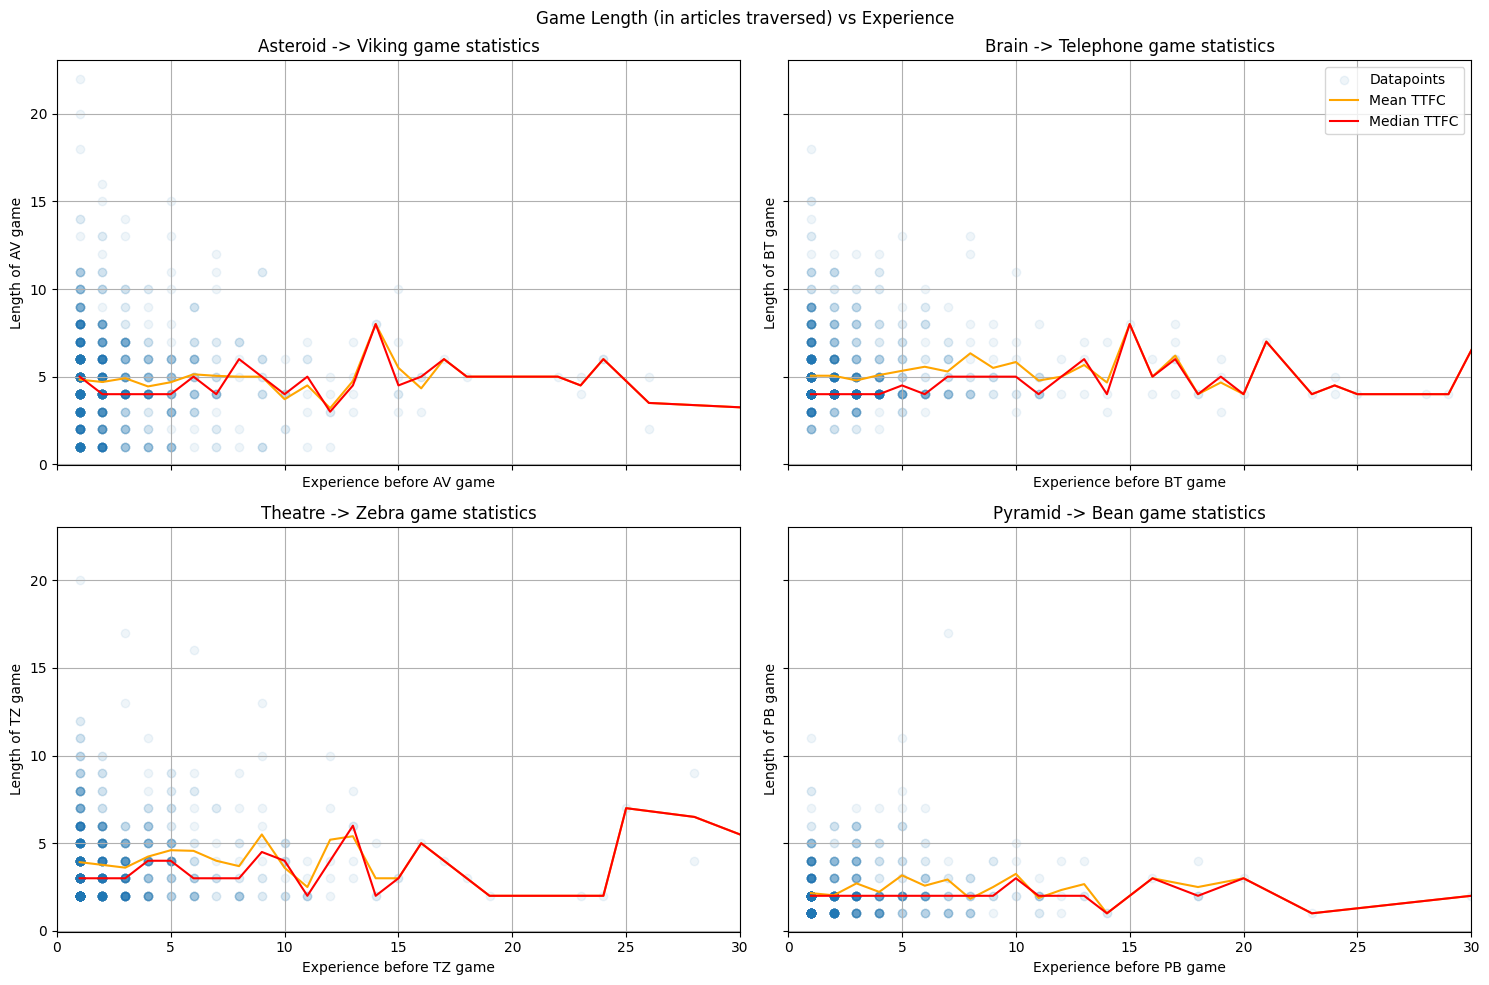

In [22]:
experience_AV = pd.DataFrame(columns=('hashedIpAddress', 'Experience before AV game', 'TTFC'))
experience_BT = pd.DataFrame(columns=('hashedIpAddress', 'Experience before BT game', 'TTFC'))
experience_TZ = pd.DataFrame(columns=('hashedIpAddress', 'Experience before TZ game', 'TTFC'))
experience_PB = pd.DataFrame(columns=('hashedIpAddress', 'Experience before PB game', 'TTFC'))

for user,data in df_success_filtered_AV:
    time_of_playing_AV = AV_trimmed[AV_trimmed.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_AV])
    TTFC = AV_trimmed[AV_trimmed.hashedIpAddress==user].TTFC.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before AV game': [number_of_games_before], 'TTFC': [TTFC]})
    experience_AV=pd.concat([experience_AV,new_row],ignore_index=True)

for user,data in df_success_filtered_BT:
    time_of_playing_BT = BT_trimmed[BT_trimmed.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_BT])
    TTFC = BT_trimmed[BT_trimmed.hashedIpAddress==user].TTFC.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before BT game': [number_of_games_before], 'TTFC': [TTFC]})
    experience_BT=pd.concat([experience_BT,new_row],ignore_index=True)

for user,data in df_success_filtered_TZ:
    time_of_playing_TZ = TZ_trimmed[TZ_trimmed.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_TZ])
    TTFC = TZ_trimmed[TZ_trimmed.hashedIpAddress==user].TTFC.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before TZ game': [number_of_games_before], 'TTFC': [TTFC]})
    experience_TZ=pd.concat([experience_TZ,new_row],ignore_index=True)

for user,data in df_success_filtered_PB:
    time_of_playing_PB = PB_trimmed[PB_trimmed.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_PB])
    TTFC = PB_trimmed[PB_trimmed.hashedIpAddress==user].TTFC.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before PB game': [number_of_games_before], 'TTFC': [TTFC]})
    experience_PB=pd.concat([experience_PB,new_row],ignore_index=True)



# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Game Length (in articles traversed) vs Experience')

# Scatter plot for AV
axes[0, 0].scatter(experience_AV['Experience before AV game'], experience_AV['TTFC'], alpha=0.07)
axes[0, 0].plot(experience_AV.groupby('Experience before AV game')['TTFC'].mean(), 'orange')
axes[0, 0].plot(experience_AV.groupby('Experience before AV game')['TTFC'].median(), 'red')
axes[0, 0].set_title('Asteroid -> Viking game statistics')
axes[0, 0].set_xlabel('Experience before AV game')
axes[0, 0].set_ylabel('Length of AV game')
axes[0, 0].set_xlim(0, 30)
axes[0, 0].grid(True)

# Scatter plot for BT
axes[0, 1].scatter(experience_BT['Experience before BT game'], experience_BT['TTFC'], alpha=0.07, label = "Datapoints")
axes[0, 1].plot(experience_BT.groupby('Experience before BT game')['TTFC'].mean(), 'orange', label = "Mean TTFC")
axes[0, 1].plot(experience_BT.groupby('Experience before BT game')['TTFC'].median(), 'red', label = "Median TTFC")
axes[0, 1].set_title('Brain -> Telephone game statistics')
axes[0, 1].set_xlabel('Experience before BT game')
axes[0, 1].set_ylabel('Length of BT game')
axes[0, 1].grid(True)
axes[0, 1].set_xlim(0, 30)
axes[0, 1].legend()

# Scatter plot for TZ
axes[1, 0].scatter(experience_TZ['Experience before TZ game'], experience_TZ['TTFC'], alpha=0.07)
axes[1, 0].plot(experience_TZ.groupby('Experience before TZ game')['TTFC'].mean(), 'orange')
axes[1, 0].plot(experience_TZ.groupby('Experience before TZ game')['TTFC'].median(), 'red')
axes[1, 0].set_title('Theatre -> Zebra game statistics')
axes[1, 0].set_xlabel('Experience before TZ game')
axes[1, 0].set_ylabel('Length of TZ game')
axes[1, 0].grid(True)
axes[1, 0].set_xlim(0, 30)

# Scatter plot for PB
axes[1, 1].scatter(experience_PB['Experience before PB game'], experience_PB['TTFC'], alpha=0.07)
axes[1, 1].plot(experience_PB.groupby('Experience before PB game')['TTFC'].mean(), 'orange')
axes[1, 1].plot(experience_PB.groupby('Experience before PB game')['TTFC'].median(), 'red')
axes[1, 1].set_title('Pyramid -> Bean game statistics')
axes[1, 1].set_xlabel('Experience before PB game')
axes[1, 1].set_ylabel('Length of PB game')
axes[1, 1].grid(True)
axes[1, 1].set_xlim(0, 30)

plt.tight_layout()
plt.show()